# Clustering with K-Means
### Clustering airlines based on average air time and average arrival delay using K-Means

There are a lot of clustering algorithms available and choosing the right one is sometimes difficult. As in our lecture, in this repository we will focus on two of the available clustering algorithms: **K-Means** and **DBSCAN**.

In this notebook we will use our beloved flights data to apply the K-Means clustering algorithm. 

At the end of this notebook you should: 
* know how to use the sklearn implementations of `K-Means`  
* know which steps are necessary to perform clustering with `K-Means`    
* know what results you will get by clustering 

For a deeper understanding of the `K-Means` algortihm, check out notebook 6 in this repository.

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Import get_dataframe function from your own sql module
from sql_functions import get_dataframe

# Import get_engine
from sql_functions import get_engine

# create a variable called engine using the get_engine function
engine = get_engine()

In [3]:
# define/assign the schema you want to query from
schema = 'hh_analytics_24_1'

In [4]:
# Get the aggregated data from the database
sql_select = f'''select 
    airline, 
    count(*) as flights, 
    avg(air_time) as avg_air_time, 
    avg(arr_delay) as avg_arr_delay
from {schema}.flights
group by 1
'''

# ''' to write the sql-query in different lines

In [5]:
# Query the database
k_means_data = pd.read_sql_query(sql_select, engine)

In [6]:
# check results
k_means_data.head()

,airline,flights,avg_air_time,avg_arr_delay
0,9E,19501,61.791292,-7.666273
1,AA,38226,140.025458,-6.076874
2,AS,10628,175.043396,-8.930206
3,B6,8937,167.544466,4.639062
4,DL,48239,135.102183,-4.898960


### Scale your data
Often the input features of your model have different units which means that the variables also have different scales. While some model types (e.g. tree-based models like decision tree or random forest) are unaffected by the scale of numerical input variables, many machine learning algorithms including f.e. algorithms using distance measures (e.g. K-Means) perform better when the input features are scaled to a specific range. 
**You can learn more about scaling in Notebook 7**

In [7]:
# Scaling with standard scaler
# First, a StandardScaler instance is defined with default hyperparameters.
# After defining we can call the fit_transform() function and pass it to our data we want to transform.

sc = StandardScaler()
scaled_data = sc.fit_transform(k_means_data[['avg_air_time', 'avg_arr_delay']])

In [8]:
# Result is a transformed array with transformed values
scaled_data

array([[-1.5527464 , -0.85398448],
       [ 0.69995618, -0.39410511],
       [ 1.70827522, -1.2196933 ],
       [ 1.49234835,  2.70646343],
       [ 0.55819364, -0.05328537],
       [ 0.37523007, -0.94321833],
       [ 0.22571071,  1.41120815],
       [ 0.74382687, -0.55955803],
       [-1.03784605,  1.10975542],
       [ 0.67343831,  0.12990026],
       [-1.3985775 ,  0.76387432],
       [-0.967938  ,  0.32292071],
       [-1.03177606, -0.16848109],
       [ 1.14846457, -0.6402114 ],
       [-0.25887898, -0.68514903],
       [-0.49647275,  0.18201104],
       [-0.88120818, -1.10844719]])

In [9]:
# set up the kmean object and cluster using the scaled data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X=scaled_data)

# Write the clusters to the dataframe as a new column
k_means_data['k_clusters'] = kmeans.labels_

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
# Check dataframe with assigned labels
k_means_data.head()

,airline,flights,avg_air_time,avg_arr_delay,k_clusters
0,9E,19501,61.791292,-7.666273,1
1,AA,38226,140.025458,-6.076874,2
2,AS,10628,175.043396,-8.930206,2
3,B6,8937,167.544466,4.639062,0
4,DL,48239,135.102183,-4.898960,2


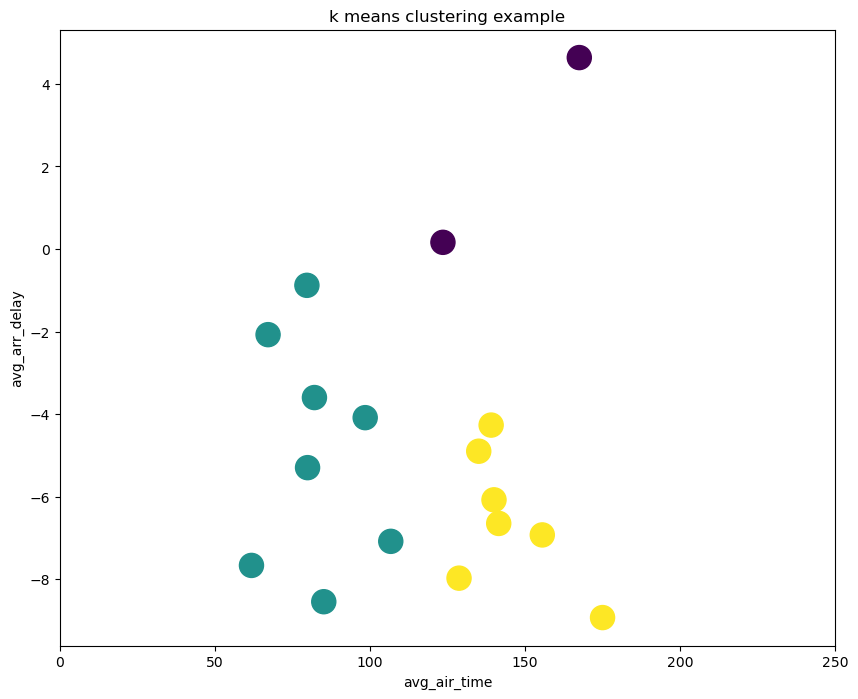

In [11]:
# Chart the data using matplotlib
fig, ax1 = plt.subplots(figsize=(10,8))

#labels
ax1.set_xlabel('avg_air_time')
ax1.set_ylabel('avg_arr_delay')
ax1.set_title('k means clustering example')
ax1.set_xlim(0,250)
#plot
plt.scatter(k_means_data['avg_air_time'], 
            k_means_data['avg_arr_delay'], 
            s = 300, 
            c = k_means_data['k_clusters'] # color based on cluster labels 
           ); 